In [1]:
import pandas as pd
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("application_cleaned.csv")
len(df)

438557

In [3]:
from sklearn.cluster import KMeans
error = [] 

for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

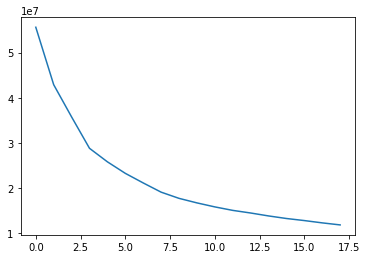

In [4]:

error = np.array(error)
plt.plot(error)

Reason for high levels of error can be attributed to the length of the dataset itself.

Since the SSE is the sum of the square root of the error of all the datapoints, and considering the big size of the dataset itself, we can therefore explain the high levels of error. However, let's have more number of clusters and judge individually.


In [67]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', max_iter = 2000, random_state = 42)
kmeans.fit(df)

KMeans(max_iter=2000, n_clusters=20, random_state=42)

In [87]:
df['clusters'] = kmeans.labels_
df['clusters'].value_counts()
df.columns

Index(['own_car', 'own_realty', 'num_child', 'income', 'age',
       'years_of_employment', 'mobile', 'work_phone', 'phone', 'email',
       'num_family_numbers', 'is_female', 'is_male', 'Commercial associate',
       'Pensioner', 'State servant', 'Student', 'Working', 'Academic degree',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Secondary / secondary special', 'Civil marriage', 'Married',
       'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'Government', 'Sales', 'Unemployed',
       'Unknown', 'has_previous_credit', 'count_X', 'count_C', 'months_late',
       'outcome', 'clusters'],
      dtype='object')

In [97]:
df.groupby('clusters')['months_late'].mean()
# 1, 14, 10, 11

clusters
0       0.256107
1       0.101380
2       0.094164
3       0.112313
4       0.473136
5       7.443519
6       0.143338
7       0.096282
8      15.119141
9       2.184806
10    176.666667
11     38.390261
12      8.012694
13      0.168894
14      0.159772
15      0.150551
16      7.558750
17      0.130390
18     14.579019
19      0.216891
Name: months_late, dtype: float64

Let's think in the shoes of a bank.

When they want to approve credit cards, they will look at "red flags" to determine whether or not they will default.

We have identified two columns here:
1. If there is credit history - for the most part, the higher the number of months late, the more likely the person is to default.

2. If someone is being unemployed. This would mean that it will take some time for them to pay back credit and therefore it will be better to NOT approve the credit card.

In this case, it would mean that cluster 5 and 9 are problematic and should be avoided.

In [85]:
df['outcome']= df['clusters'].apply(lambda x: 0 if x in [1, 10, 11, 14] else 1)
df.drop('clusters', axis = 1, inplace = True)

In [86]:
df.to_csv("application_with_outcome.csv")